# test edge detection

In [1]:

from skimage import feature

import numpy as np


import xarray as xr

import matplotlib.pyplot as plt

In [2]:
fname = '19011711'
ds = xr.open_dataset(fname +'.nc', group='Beam')
ds

<xarray.Dataset>
Dimensions:                                         (frequency: 3, ping_time: 421, range_bin: 1999)
Coordinates:
  * frequency                                       (frequency) int64 38000 ....
  * ping_time                                       (ping_time) datetime64[ns] ...
  * range_bin                                       (range_bin) int64 0 ... 1998
Data variables:
    backscatter_r                                   (frequency, ping_time, range_bin) int64 ...
    equivalent_beam_angle                           (frequency) float64 ...
    gain_correction                                 (frequency) float64 ...
    sample_interval                                 (frequency) float64 ...
    transmit_duration_nominal                       (frequency) float64 ...
    temperature_counts                              (ping_time) int64 ...
    tilt_x_count                                    (ping_time) int64 ...
    tilt_y_count                                    (ping_time) int64 ...
    tilt_x                                          (ping_time) float64 ...
    tilt_y                                          (ping_time) float64 ...
    cos_tilt_mag                                    (ping_time) float64 ...
    DS                                              (frequency) float64 ...
    EL                                              (frequency) float64 ...
    TVR                                             (frequency) float64 ...
    VTX                                             (frequency) float64 ...
    Sv_offset                                       (frequency) float64 ...
    number_of_samples_digitized_per_pings           (frequency) int64 ...
    number_of_digitized_samples_averaged_per_pings  (frequency) int64 ...
Attributes:
    beam_mode:                  
    conversion_equation_t:      type_4
    number_of_frequency:        3
    number_of_pings_per_burst:  1
    average_burst_pings_flag:   0
    temperature_ka:             532.6859171
    temperature_kb:             3000.0
    temperature_kc:             2.870441838
    temperature_A:              0.001466
    temperature_B:              0.000238809
    temperature_C:              1.00335e-07
    tilt_X_a:                   0.0
    tilt_X_b:                   0.0
    tilt_X_c:                   0.0
    tilt_X_d:                   0.0
    tilt_Y_a:                   0.0
    tilt_Y_b:                   0.0
    tilt_Y_c:                   0.0
    tilt_Y_d:                   0.0

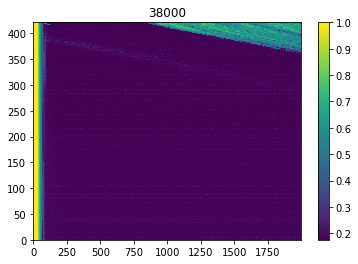

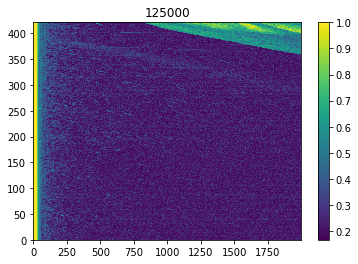

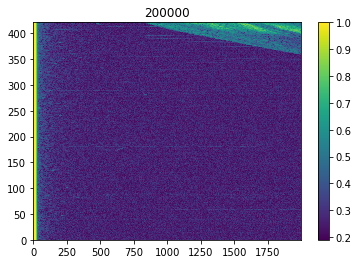

In [18]:
for f in ds.frequency:
    plt.figure()
    plt.title(str(f.values))
    plt.pcolormesh( ds.backscatter_r.sel(frequency = f)/ds.backscatter_r.sel(frequency = f).max() )
    plt.colorbar()

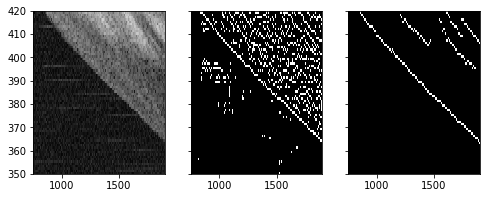

In [10]:
f = 38000
f = 200000

dat = ds.backscatter_r.sel(frequency = f).data
im = dat /dat.max() 
# im = dat
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.pcolormesh(im, cmap=plt.cm.gray)

ax2.pcolormesh(edges1, cmap=plt.cm.gray)

ax3.pcolormesh(edges2, cmap=plt.cm.gray)

for ax in [ax1, ax2, ax3]:
#     ax.set_xlim([0,100])
    ax.set_xlim([750,1900])
    ax.set_ylim([350,420])

Text(0.5, 1.0, 'Canny filter, $\\sigma=3$')

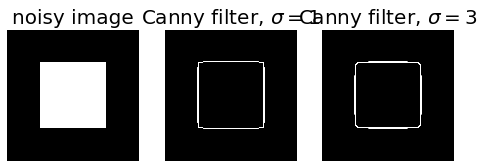

In [10]:
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

In [11]:
from echopype import Process
# nc_path = fname + '.nc'  # path to a converted nc file
nc_path = 'combined_file.nc'
# nc_path =glob.glob('./*.nc') # try to look at many files
ed = Process(nc_path)   # create a processing object
# ed.temperature = -1   # temperature in degree Celsius
# ed.salinity = 34.5     # salinity in PSU
# ed.pressure = 50     # pressure in dbar
# ed.recalculate_environment()  # recalculate related parameters

ed.calibrate()           # Sv
ed.remove_noise()        # denoise
ed.get_MVBS()  

Initialize using average temperature recorded by instrument
12:32:42  calibrating data in combined_file.nc
12:32:44  Remove noise from Sv stored in memory.
12:32:47  use Sv stored in memory to calculate MVBS


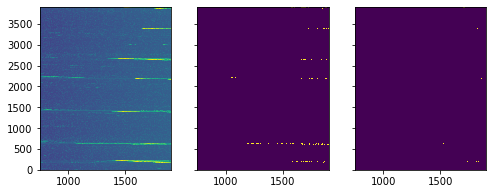

In [17]:


# f = 38000
# f = 200000
f = 125000

dat = ed.Sv_clean.sel(frequency = f).Sv.data
im = dat
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.pcolormesh(im, )

ax2.pcolormesh(edges1)
ax3.pcolormesh(edges2)

for ax in [ax1, ax2, ax3]:
#     ax.set_xlim([0,100])
    ax.set_xlim([750,1900])
#     ax.set_ylim([350,420])